# 🧪 Diabetes Risk Classification Project
This notebook classifies patients into high-risk or low-risk for diabetes based on health metrics using Logistic Regression and Random Forest.

## 📥 Step 1: Load the Dataset

In [16]:

# Step 1: Load the Dataset
import pandas as pd
file_path = 'diabetes.xlsx'
data = pd.read_excel(file_path, header=1)
data.columns = data.columns.str.strip()
print(data.head())


     id   chol  stab.glu   hdl  ratio  glyhb    location  age  gender  height  \
0  1000  203.0        82  56.0    3.6   4.31  Buckingham   46  female    62.0   
1  1001  165.0        97  24.0    6.9   4.44  Buckingham   29  female    64.0   
2  1002  228.0        92  37.0    6.2   4.64  Buckingham   58  female    61.0   
3  1003   78.0        93  12.0    6.5   4.63  Buckingham   67    male    67.0   
4  1005  249.0        90  28.0    8.9   7.72  Buckingham   64    male    68.0   

   weight   frame  bp.1s  bp.1d  bp.2s  bp.2d  waist   hip  time.ppn  
0   121.0  medium  118.0   59.0    NaN    NaN   29.0  38.0     720.0  
1   218.0   large  112.0   68.0    NaN    NaN   46.0  48.0     360.0  
2   256.0   large  190.0   92.0  185.0   92.0   49.0  57.0     180.0  
3   119.0   large  110.0   50.0    NaN    NaN   33.0  38.0     480.0  
4   183.0  medium  138.0   80.0    NaN    NaN   44.0  41.0     300.0  


## 🧹 Step 2: Clean Column Names

In [15]:
data.columns = data.columns.str.strip()
data.columns

Index(['id', 'chol', 'stab.glu', 'hdl', 'ratio', 'glyhb', 'location', 'age',
       'gender', 'height', 'weight', 'frame', 'bp.1s', 'bp.1d', 'bp.2s',
       'bp.2d', 'waist', 'hip', 'time.ppn'],
      dtype='object')

## 🧼 Step 3: Impute Missing Values

In [17]:

# Step 2: Impute Missing Values
from sklearn.impute import SimpleImputer

numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
if len(numeric_cols) > 0:
    imputer = SimpleImputer(strategy='mean')
    data[numeric_cols] = imputer.fit_transform(data[numeric_cols])
print("Missing values handled.")


Missing values handled.


## 🔣 Step 4: Encode Categorical Columns

In [18]:
categorical_cols = data.select_dtypes(include='object').columns
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

## 🎯 Step 5: Create Binary Classification Target from `glyhb`

In [19]:

# Clean all column names: strip spaces and lowercase
data.columns = data.columns.str.strip().str.lower()

# Now this should work safely
data['glyhb_risk'] = (data['glyhb'] > 7).astype(int)



In [21]:

# Step 3: Create Target Column for Classification
data['glyhb_risk'] = (data['glyhb'] > 7).astype(int)
print(data[['glyhb', 'glyhb_risk']].head())


   glyhb  glyhb_risk
0   4.31           0
1   4.44           0
2   4.64           0
3   4.63           0
4   7.72           1


## ✂️ Step 6: Train/Test Split

In [28]:

# Step 4: Train-Test Split
from sklearn.model_selection import train_test_split

X = data.drop(['glyhb', 'glyhb_risk'], axis=1)
X = pd.get_dummies(X)
y = data['glyhb_risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


## 📈 Step 7: Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

log_model = LogisticRegression(max_iter=1000, solver='liblinear')
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, log_preds))
print(confusion_matrix(y_test, log_preds))
print(classification_report(y_test, log_preds))

Logistic Regression Accuracy: 0.9320987654320988
[[134   3]
 [  8  17]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       137
           1       0.85      0.68      0.76        25

    accuracy                           0.93       162
   macro avg       0.90      0.83      0.86       162
weighted avg       0.93      0.93      0.93       162



## 🌲 Step 8: Random Forest Classifier

In [30]:

# Step 6: Random Forest Model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42, max_depth=None, min_samples_split=5, n_estimators=150)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print(confusion_matrix(y_test, rf_preds))
print(classification_report(y_test, rf_preds))


Random Forest Accuracy: 0.9320987654320988
[[134   3]
 [  8  17]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       137
           1       0.85      0.68      0.76        25

    accuracy                           0.93       162
   macro avg       0.90      0.83      0.86       162
weighted avg       0.93      0.93      0.93       162



## ⭐ Step 9: Feature Importance

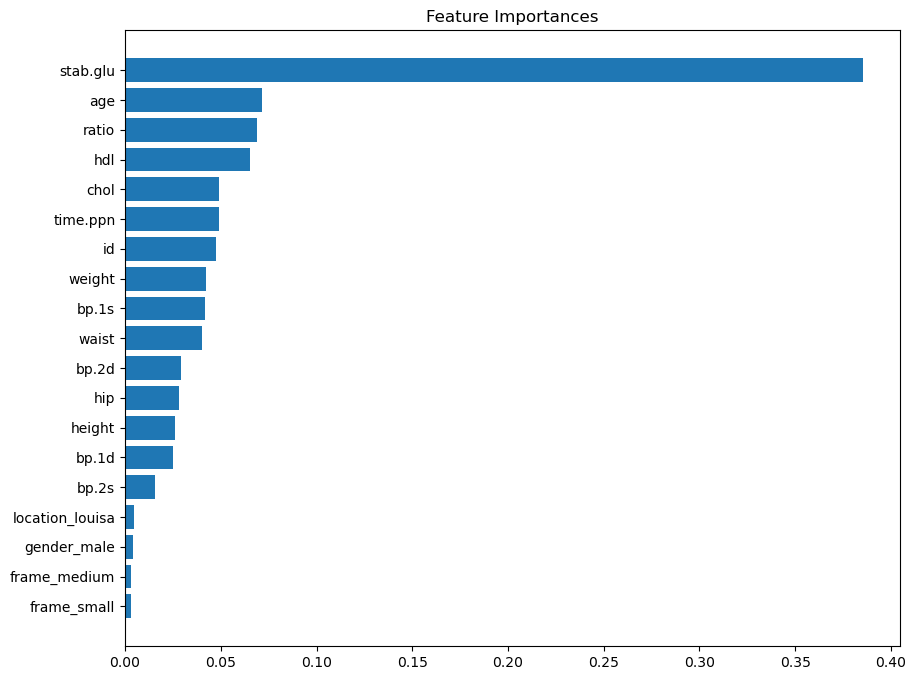

In [31]:

# Step 7: Feature Importance
import matplotlib.pyplot as plt
import numpy as np

importances = rf_model.feature_importances_
indices = np.argsort(importances)
features = X.columns

plt.figure(figsize=(10, 8))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.title('Feature Importances')
plt.show()


## 📊 Step 10: ROC Curve

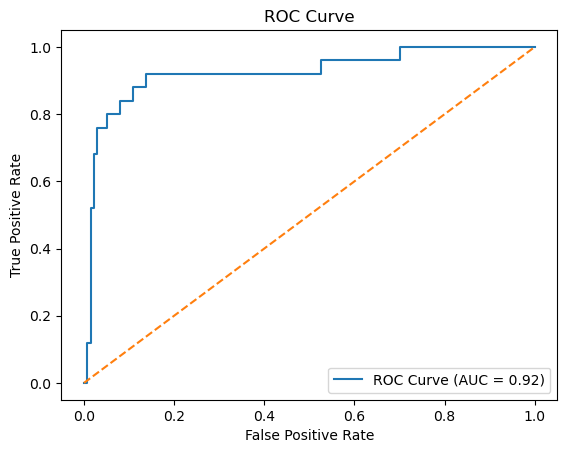

In [32]:

# Step 8: ROC Curve
from sklearn.metrics import roc_curve, auc

rf_probs = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, rf_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


## ✅ Summary
- **Best Accuracy**: 93.2% (Logistic Regression)
- **AUC**: 0.92 (Random Forest)
- **Top Features**: `stab.glu`, `age`, `ratio`
- The model is effective for identifying diabetes risk based on health metrics.